In [1]:
## Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
## Test set Image Processing

In [142]:
validation_set = tf.keras.utils.image_dataset_from_directory(
'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [156]:
## Loading model

In [158]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

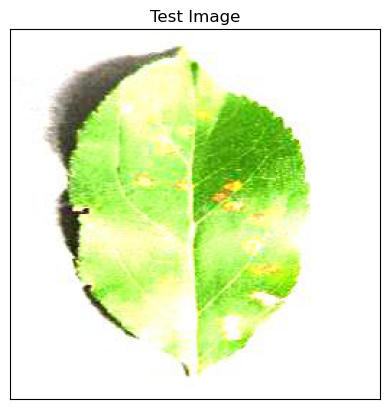

In [160]:
#Test Image Visualization
import cv2
image_path = 'test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
## Testing Model

In [164]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 30ms/step


In [166]:
print(predictions)

[[1.15054712e-08 9.43127443e-09 9.99767363e-01 3.25764127e-08
  5.86866918e-07 6.30452917e-08 3.45404838e-09 3.70021458e-09
  3.09052922e-10 3.85873944e-10 2.92048226e-11 5.52840396e-09
  2.60348587e-09 1.51139153e-11 2.52147037e-09 3.67461439e-07
  1.39692595e-08 1.09593703e-08 1.50464601e-08 1.15928408e-07
  2.70583278e-10 1.78019655e-10 3.08654258e-09 1.15099874e-09
  8.47006146e-11 2.38665177e-09 3.40375263e-11 1.16803595e-10
  1.22425013e-06 1.53176330e-07 2.25594733e-04 1.00130954e-07
  3.08317908e-06 1.26642048e-08 4.27026009e-07 9.22662551e-08
  3.17874438e-08 6.55803376e-07]]


In [168]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


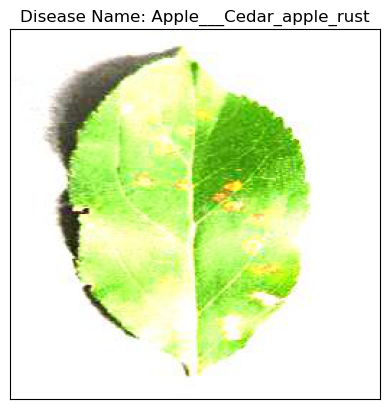

In [170]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()